In [1]:
## Imports
import numpy as np
import os
import pandas as pd
from google.colab import drive
from shutil import copyfile
import zipfile
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from datetime import date, datetime

In [ ]:
## Link Google Drive account and download dataset
drive.mount('/content/gdrive')
#copyfile('gdrive/My Drive/Progetto Marketing Analytics/Dataset/data_marketing_analytics_2023.zip', 'data_marketing_analytics_2023.zip')
copyfile('gdrive/My Drive/Magistrale/Progetto Marketing Analytics/Dataset/data_marketing_analytics_2023.zip', 'data_marketing_analytics_2023.zip')
zipf = zipfile.ZipFile('data_marketing_analytics_2023.zip')
zipf.extractall()
zipf.close()

Mounted at /content/gdrive


In [ ]:
## Load dataset into dataframes
addresses = pd.read_csv("tbl_addresses.csv")
customer_accounts = pd.read_csv("tbl_customer_accounts.csv")
customer_reviews = pd.read_csv("tbl_customer_reviews.csv")
customers = pd.read_csv("tbl_customers.csv")
labelled_reviews = pd.read_csv("tbl_labelled_reviews.csv")
orders = pd.read_csv("tbl_orders.csv")
products = pd.read_csv("tbl_products.csv")

## Descriptive statistics

In [ ]:
today = datetime.now()
date_diff = []

for el in pd.to_datetime(customer_accounts['activation_date']):
  tmp = today-(el.to_pydatetime())
  date_diff.append(tmp.days)


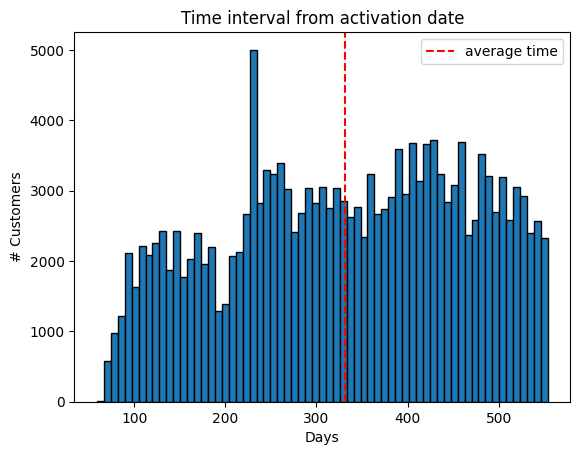

In [ ]:
plt.hist(date_diff, bins='auto', edgecolor='black')

line_trend = np.mean(date_diff)

# Plot the line trend
plt.axvline(x=line_trend, color='red', linestyle='--', label='Line Trend')


# Set the labels and title
plt.xlabel('Days')
plt.ylabel('# Customers')
plt.title('Time interval from activation date')

plt.legend(labels=["average time"])

# Display the plot
plt.show()

Text(0.5, 1.0, 'Histogram of Job type')

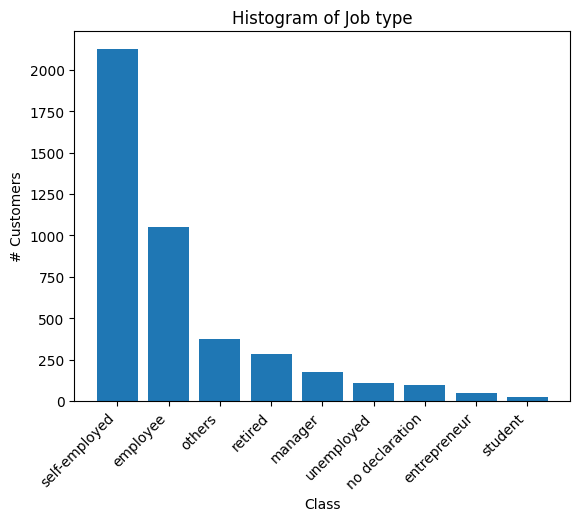

In [ ]:
class_counts = customers['job_type'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Class')
plt.ylabel('# Customers')
plt.title('Histogram of Job type')

# Sentiment Analysis Model

In [2]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from pprint import pprint
import string
import torch
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download([
    "wordnet",
    "omw-1.4",
    "punkt",
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_

True

In [ ]:
def print_count_labels(label):
  cont_diz = {}
  cont_diz['cont_pos']=0
  cont_diz['cont_neg']=0
  cont_diz['cont_neu']=0
  for el in range(len(label)):
    if label.iloc[el]=='positive':
      cont_diz['cont_pos']+=1
    if label.iloc[el]=='negative':
      cont_diz['cont_neg']+=1
    if label.iloc[el]=='neutral':
      cont_diz['cont_neu']+=1

  return cont_diz

## Plot insight

Sentiment Distribution

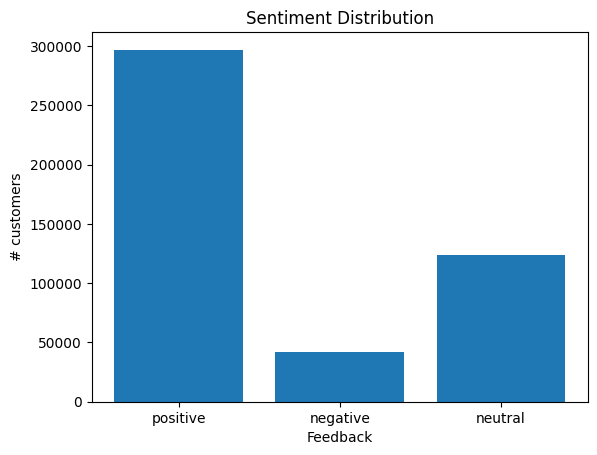

In [ ]:
tmp = print_count_labels(labelled_reviews['sentiment_label'])

plt.bar(['positive','negative','neutral'], tmp.values())
plt.xlabel('Feedback')
plt.ylabel('# customers')
plt.title('Sentiment Distribution')
plt.show()

Word Cloud plotting

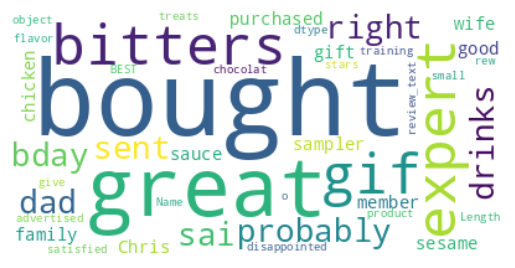

In [ ]:
from wordcloud import WordCloud

# Generate word cloud
word_cloud = WordCloud(collocations=False, background_color="white").generate(str(labelled_reviews["review_text"]))

# Display the word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## If you don't want to run all the following code run this chunk
Skip all the Data Preparation section

In [ ]:
data_0 = labelled_reviews[labelled_reviews['sentiment_label']=='positive'].sample(n=3000,random_state=42)
data_1 = labelled_reviews[labelled_reviews['sentiment_label']=='negative'].sample(n=3000,random_state=42)
data_2 = labelled_reviews[labelled_reviews['sentiment_label']=='neutral'].sample(n=3000,random_state=42)

In [ ]:
df = pd.concat([data_0, data_1, data_2]).sample(frac=1, random_state=42).reset_index(drop=True)
df

,labelled_reviews_index,review_text,sentiment_label
0,140947,This item is sweet and tangy. I didn't realiz...,neutral
1,85940,"My spoiled kitty has lots of fun toys, but thi...",positive
2,82795,"I had this lovely tea at a local restaurant, a...",positive
3,212201,My entire family of five tried this and we all...,negative
4,150621,this is not your peanut butter consistency its...,neutral
...,...,...,...
8995,336670,Followed all instructions. Only one mushroom g...,negative
8996,294571,"howdy y'all,<br /><br />outrageous price? this...",negative
8997,368052,I read all the positive reviews and thought I'...,negative
8998,361674,My dogs just aren't into the plastic bones and...,positive


In [ ]:
tmp = print_count_labels(df['sentiment_label'])
print(f"{tmp['cont_pos']} positive, {tmp['cont_neg']} negative, {tmp['cont_neu']} neutral")

3000 positive, 3000 negative, 3000 neutral


## Data preparation

We will erase '…', '’' and '–' because this character won't be catch in the vectorizer function.

In [ ]:
tmp = []
for el in df['review_text']:
  string = el.replace('…','')
  string = string.replace('’','')
  string = string.replace(':','')
  tmp.append(string.replace('–',''))
df['review_text']=tmp
df

,labelled_reviews_index,review_text,sentiment_label
0,140947,This item is sweet and tangy. I didn't realiz...,neutral
1,85940,"My spoiled kitty has lots of fun toys, but thi...",positive
2,82795,"I had this lovely tea at a local restaurant, a...",positive
3,212201,My entire family of five tried this and we all...,negative
4,150621,this is not your peanut butter consistency its...,neutral
...,...,...,...
8995,336670,Followed all instructions. Only one mushroom g...,negative
8996,294571,"howdy y'all,<br /><br />outrageous price? this...",negative
8997,368052,I read all the positive reviews and thought I'...,negative
8998,361674,My dogs just aren't into the plastic bones and...,positive


Remove all the Stop Words and duplicates with nltk

In [ ]:
import string
import re

def preprocess_text(text):
    stop_words = nltk.corpus.stopwords.words("english")
    tokens = tf.strings.split(text)
    tokens = tf.boolean_mask(tokens, ~tf.reduce_any(tf.equal(tokens[:, tf.newaxis], list(stop_words)), axis=1))
    tmp = [re.sub('[^a-zA-Z0-9]', '', w.numpy().decode().lower()) for w in tokens if re.sub('[^a-zA-Z0-9]', '', w.numpy().decode().lower()) not in stop_words]

    print(tmp)

    return tmp

preprocessed_sentences = [] # this is the tensor list of all the 50 sentences
for el in df['review_text']:
  preprocessed_sentences.append(preprocess_text(el))
print(len(preprocessed_sentences))

Output hidden; open in https://colab.research.google.com to view.

Stemming and Lemming

In [ ]:
# Initialize Python porter stemmer
ps = PorterStemmer()

stemmed_sentences = []

# Perform stemming
for sentence in preprocessed_sentences:
    stemmed_words = [ps.stem(word) for word in sentence]
    stemmed_sentences.append(stemmed_words)

preprocessed_sentences = stemmed_sentences

In [ ]:
# Initialize WordNet lemmatizer
wnl = WordNetLemmatizer()

lemmatized_sentences = []

# Perform lemmatization
for sentence in preprocessed_sentences:
    lemmatized_words = [wnl.lemmatize(word, pos="v") for word in sentence]
    lemmatized_sentences.append(lemmatized_words)

preprocessed_sentences = lemmatized_sentences

## Sentence rejoined

To perform the dataset splitting we have to re-join the sentences in order to recreate the original sentences structure.

In [ ]:
sentences = [' '.join(el) for el in preprocessed_sentences]
labels = [df['sentiment_label'][idx] for idx, _ in enumerate(preprocessed_sentences)]
label = labels

sentences_def = [i.replace('’', '') for i in sentences]
vocabulary_def = sentences_def


In [ ]:
df_def = pd.DataFrame(list(zip(sentences_def, label)),
               columns =['TextData', 'label'])
df_def

,TextData,label
0,item sweet tangi realiz order much wish indivi...,neutral
1,spoil kitti lot fun toy hand favorit toy play ...,positive
2,love tea local restaur immedi come home order ...,positive
3,entir famili five tri agre disgust kcup ever tast,negative
4,peanut butter consist littl meali stiff enjoy...,neutral
...,...,...
8995,follow instruct one mushroom grow first round ...,negative
8996,howdi yallbr br outrag price thirti buck two h...,negative
8997,read posit review think id give tri first tast...,negative
8998,dog plastic bone chew toy love cow hoov pack ...,positive


In [ ]:
save = pd.DataFrame(df_def)
save.to_csv('cleaned_sentences_tmp_lemming.csv')

df_def it's a list of lists, we have to transform it in a list of sentence.

In [ ]:
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [ ]:
vocabulary = []
for el in preprocessed_sentences[1:]:  # skip the first row of numbers
  vocabulary.append(' '.join(el))

vocabulary_def = []
for i in vocabulary:
  vocabulary_def.append(i.replace('’',''))

vocabulary_def

['spoil kitti lot fun toy hand favorit toy play love hide watch flick around go attack jump flip chase pounc whatev take catch weve toy sever month day goe seek play he indoor cat quit hunter realli enjoy thrill hunt give lot good exercisebr br cat love much buy one son cat well cat crazi itbr br buy one plan buy one two extra feather attach sell separ feather hold well eventu wear much play time side find string attach wand feather kitti eventu chew reknot string make littl shorter play cat chew everyth though other may experi small issu even shorten string toy continu give cat hour fun playtim togeth',
 'love tea local restaur immedi come home order home scent flavor jasmin heavenli without bitter overpow truli best cup jasmin tea ive ever cant wait order get',
 'entir famili five tri agre disgust kcup ever tast',
 'peanut butter consist littl meali stiff  enjoy itit tast fresh welleveri awhil crave cashew answer one sore mouth',
 'oki read review ring splendid aw take plung like sal

## Vectorizer

In [ ]:
max_sentence = len(max(df_def['TextData'], key=len).split()) # it's used to define output_sequence_length
words_per_sentence = max_sentence   # the max length of the sentences is 3432

In [ ]:
# Instantiate a vectorizer
vectorizer = TextVectorization(
    max_tokens=None, # we don't set the max size of the vocabulary
    standardize="lower_and_strip_punctuation",
    output_sequence_length=words_per_sentence)

## Dataset splitting

In [ ]:
# Specify the ratio of training-validation data and compute the corresponding number of elements
split_fraction = 0.8
length = len(df_def)
N_train = int(split_fraction * length)
N_train

7200

For our model

In [ ]:
Y = pd.get_dummies(df_def['label']).values #One-hot encoding
x_train_val_model1 = df_def[0:N_train]['TextData']
y_train_val_model1 = Y[0:N_train]

x_test_model1 = df_def[N_train:]['TextData']
y_test_model1 = Y[N_train:]

In [ ]:
length = len(x_train_val_model1)
N_val = int(split_fraction * length)
N_val

x_train_model1 = x_train_val_model1[0:N_val]
y_train_model1 = y_train_val_model1[0:N_val]

x_val_model1 = x_train_val_model1[N_val:]
y_val_model1 = y_train_val_model1[N_val:]

For BERT model

In [ ]:
x_train_val = df_def[0:N_train]['TextData']
y_train_val = df_def[0:N_train]['label']

x_test_bert = df_def[N_train:]['TextData']
y_test_bert = df_def[N_train:]['label']

In [ ]:
length = len(x_train_val)
N_val = int(split_fraction * length)
N_val

x_train_bert = x_train_val[0:N_val]
y_train_bert = y_train_val[0:N_val]

x_val_bert = x_train_val[N_val:]
y_val_bert = y_train_val[N_val:]

Integer Encoding of the labels (of the training set).

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# positive --> 2, neutral --> 1, negative --> 0

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform one-hot encoding using the custom labels
integer_encoded = label_encoder.fit_transform(y_train_bert)
y_train_bert = integer_encoded

integer_encoded = label_encoder.fit_transform(y_val_bert)
y_val_bert = integer_encoded

integer_encoded = label_encoder.fit_transform(y_test_bert)
y_test_bert = integer_encoded

In [ ]:
# Convert targets to pure arrays (we will take care of x_train and x_val later)
y_train_model1 = np.array(y_train_model1)
y_val_model1 = np.array(y_val_model1)
y_test_model1 = np.array(y_test_model1)


y_train_bert = np.array(y_train_bert)
y_val_bert = np.array(y_val_bert)
y_test_bert = np.array(y_test_bert)

In [ ]:
len(x_train_model1)

5760

## Vocabulary creation on the Training dataset

In [ ]:
# Vectorization of the TRAINING SENTENCES after removing stop words

vectorizer.adapt(x_train_model1)  # apply it to the training set
vectorized_sentences = vectorizer(x_train_model1)   # this compute the vector matrix of the vocabulary
print(set(vectorizer.get_vocabulary()))  # vocabulary of the whole dataset
print((vectorized_sentences))  # matrix where each row is a sentence which contains the value associated to the vectorizer/vocabulary

{'', 'whoa', 'halfcup', 'overstock', 'allergi', 'dew', 'jitteri', 'admir', 'plesent', 'corpoat', 'petfooddirect', 'acidsbr', 'likebr', 'foodstuff', 'sucroselik', 'multi', 'lipton', 'lash', 'lookout', 'structur', 'beanstrung', 'wheatfre', 'sizzl', 'confid', 'chevi', 'dick', 'definit', 'lesson', 'rhetor', 'lilith', 'naturalno', 'overus', '3star', 'deoder', '33012', 'portion', 'iggi', 'entirelypet', 'carver', 'franklybr', 'buffi', 'bariatr', 'limpest', 'purchasinglesson', 'paddl', 'sinewey', 'gobbetti', 'sneer', '221', 'edit', 'ray', 'orign', 'medley', 'chickenveget', 'beginn', 'petal', '48oz', 'secondplac', 'ratingbr', 'steaz', 'box', 'feedingsbr', '15g', 'nibsa', 'estim', 'badnot', 'reommened', 'toward', 'affection', 'buildup', 'mourn', 'mikish', 'tenyear', 'cata', 'dimebr', '832011', 'canopen', 'onesbr', '60jar', 'icon', 'she', 'recours', 'captiv', 'wraparound', 'smellsflavor', 'bastianich', 'sensitiveallerg', 'floppygelatinish', 'itd', 'recoil', 'lorenzano', 'whiskey', 'colorsbr', 'fr

In [ ]:
x_train_model1 = vectorizer(x_train_model1).numpy()
x_val_model1 = vectorizer(x_val_model1).numpy()
x_test_model1 = vectorizer(x_test_model1).numpy()

In [ ]:
len(vectorizer.get_vocabulary()) # length of our vocabulary

15602

## GLOVE Embedding

In [ ]:
#import GloVe into python dictionary
copyfile('/content/gdrive/MyDrive/Magistrale/Progetto Marketing Analytics/Dataset/glove.6B.100d.zip', 'glove.6B.100d.zip')

# Extract the GloVe file
with zipfile.ZipFile('glove.6B.100d.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the GloVe embeddings into a dictionary
embeddings_index = {}
with open('glove.6B.100d.txt', 'r+', encoding="utf-8") as f:
  # For each text line
  for line in f:
    # Separate the word-string from the 100-dimensional-vector-string
    word, coeffs = line.split(maxsplit=1)
    # Convert 100-dimensional vector string into a proper floating point vector
    coeffs = np.fromstring(coeffs, "f", sep=" ")
    # Create a new dictionary entry
    embeddings_index[word] = coeffs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Size of the matrix: 20002 rows x 100 dimensions
#   20000 words from our vocabulary + word separator + [unknown word]
#   30-dimensional representation from GloVe
total_words=0
for i in vectorizer.get_vocabulary():
    total_words += 1
print(total_words)
embedding_dim = 100  # number of GloVe dimensions (how many dimensions that capture properties of the words)
embedding_matrix = np.zeros((total_words+2, embedding_dim))

# For each word in our vocabulary
for i, word in enumerate(vectorizer.get_vocabulary()):
    # Search corresponding embedding in GloVe,
    # and add it in the correct row of the embedding matrix
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        print(word)
        #print(embedding_matrix[i])
    # else: words not found in embedding index will be all-zeros.

Output streaming troncato alle ultime 5000 righe.
solvent
soften
skim
similac
silk
sight
shut
shepherd
rope
resort
remark
record
rank
r
prone
profession
pollux
pm
plump
plantain
petsmart
pesto
peet
paul
path
parsley
paint
omg
nuke
nonetheless
nicer
nevertheless
nespresso
nacho
monosodium
mojito
miso
maltodextrin
lite
liquor
lindt
lentil
knife
keeper
juli
journal
jaw
itch
industri
hull
hotter
hors
healthiest
hang
habanero
guilt
gripe
greek
gray
grandma
goat
glycerin
gi
fusion
frontier
florida
fleck
faith
facil
extend
expos
emeril
eager
dumb
drier
dot
domin
discern
diaper
devic
dedic
damn
currant
critic
constant
connect
colombian
co
closet
client
cfh
ceylon
caveat
carmel
canin
camp
buzz
buri
btw
british
brick
breeder
bergamot
bene
bathroom
basmati
ban
ash
arsen
appetit
ant
aka
airtight
99
600
55
32
140
whim
whiff
western
weather
tzu
trigger
towel
torani
tofu
thirst
theme
thaw
task
tape
swing
strike
stream
spaniel
south
sole
soil
sneak
shorter
shipper
shih
sediment
seam
scarf
sage
russian

## Model Definition and Training

In [ ]:
num_tokens = len(vectorizer.get_vocabulary())  # Size of the vocabulary

embedding_layer = Embedding(
    input_dim = num_tokens,
    output_dim = embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable = False
)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.metrics import SparseCategoricalAccuracy


In [ ]:

learning_rate = 1e-3

model_scratch = Sequential([
    (keras.Input(shape=(words_per_sentence,), dtype='int64')),
    (Embedding(input_dim = num_tokens,output_dim = embedding_dim)),
    (LSTM(16, dropout=0.3, activation='tanh')),
    (Dense(3,activation='softmax'))
])
model_scratch.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate),metrics = ['Accuracy'])
print(model_scratch.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 851, 100)          1560200   
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 1,567,739
Trainable params: 1,567,739
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model_scratch.fit(x_train_model1,
          y_train_model1,
          epochs = 20,
          batch_size = 64,
          validation_data=(x_val_model1, y_val_model1),
          verbose = 1);

Epoch 1/20
90/90 [==============================] - 30s 293ms/step - loss: 1.0994 - Accuracy: 0.3252 - val_loss: 1.0993 - val_Accuracy: 0.3458
Epoch 2/20
90/90 [==============================] - 20s 220ms/step - loss: 1.0995 - Accuracy: 0.3297 - val_loss: 1.0987 - val_Accuracy: 0.3035
Epoch 3/20
90/90 [==============================] - 16s 178ms/step - loss: 1.0989 - Accuracy: 0.3429 - val_loss: 1.0975 - val_Accuracy: 0.3458
Epoch 4/20
90/90 [==============================] - 13s 150ms/step - loss: 1.0991 - Accuracy: 0.3304 - val_loss: 1.1011 - val_Accuracy: 0.3035
Epoch 5/20
90/90 [==============================] - 12s 136ms/step - loss: 1.0988 - Accuracy: 0.3429 - val_loss: 1.0991 - val_Accuracy: 0.3458
Epoch 6/20
90/90 [==============================] - 11s 124ms/step - loss: 1.0989 - Accuracy: 0.3351 - val_loss: 1.1008 - val_Accuracy: 0.3035
Epoch 7/20
90/90 [==============================] - 10s 108ms/step - loss: 1.0992 - Accuracy: 0.3345 - val_loss: 1.1010 - val_Accuracy: 0.3035

In [ ]:
batch_size = 32
loss,acc = model_scratch.evaluate(x_test_model1, y_test_model1, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (loss))
print("acc: %.2f" % (acc))

57/57 - 1s - loss: 1.0985 - Accuracy: 0.3406 - 823ms/epoch - 14ms/step
score: 1.10
acc: 0.34


## Model Evaluation

In [5]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

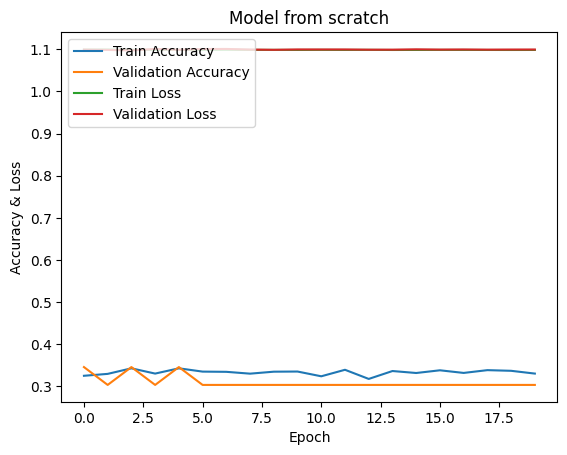

In [ ]:
plt.figure()
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model from scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.legend(loc='upper left')


plt.show()

## Modello pre-trained BERT

In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.7 MB/s eta 0:00:00


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
num_classes = 3

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

In [ ]:
y_train_bert = np.array(y_train_bert)
y_test_bert = np.array(y_test_bert)

In [ ]:
def convert_example_to_feature(review):
  return bert_tokenizer.encode_plus(review,
                add_special_tokens = True,     # add [CLS], [SEP]
                padding='max_length',
                truncation=True,
                return_attention_mask = True,  # add attention mask to not focus on pad tokens
              )

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(ds):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for review, label in ds:
    bert_input = convert_example_to_feature(review)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# hyper-parameters
batch_size = 8
# train dataset
ds_train = zip(x_train_bert, y_train_bert)
ds_test = zip(x_test_bert, y_test_bert)
ds_train_encoded = encode_examples(ds_train).batch(batch_size)
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

In [ ]:
seed_value = 42

# Imposta il seed per TensorFlow
tf.random.set_seed(seed_value)

# Imposta il seed per Python's random module
random.seed(seed_value)

# Imposta il seed per NumPy
np.random.seed(seed_value)

# Imposta il seed per l'ambiente di esecuzione CUDA per rendere le operazioni con GPU deterministiche
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
model_save_path = './sentiment-analysis-using-bert-keras/models/bert_model.h5'

path = "./sentiment-analysis-using-bert-keras/models/"

## Initialize pre-built BERT-based classifier from transformers
bert_model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=num_classes)

bert_model.summary()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 1e-5
# multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 3
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(loss=loss,
                   optimizer=optimizer,
                   metrics=['Accuracy'])

In [ ]:
history = bert_model.fit(ds_train_encoded,
                         batch_size=batch_size,
                         epochs=number_of_epochs,
                         validation_data=ds_test_encoded)

Epoch 1/3
720/720 [==============================] - 786s 1s/step - loss: 0.9144 - Accuracy: 0.5512 - val_loss: 0.7883 - val_Accuracy: 0.6417
Epoch 2/3
720/720 [==============================] - 729s 1s/step - loss: 0.6653 - Accuracy: 0.7170 - val_loss: 0.8513 - val_Accuracy: 0.6306
Epoch 3/3
720/720 [==============================] - 730s 1s/step - loss: 0.5116 - Accuracy: 0.7984 - val_loss: 0.8298 - val_Accuracy: 0.6639


In [ ]:
batch_size = 8
score, acc = bert_model.evaluate(ds_test_encoded, batch_size=batch_size)
print(f"score: {score:.2f}")
print(f"acc: {acc:.2f}")

225/225 [==============================] - 74s 329ms/step - loss: 0.8298 - Accuracy: 0.6639
score: 0.83
acc: 0.66


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6), dpi=150)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j,
                     i,
                     "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j,
                     i,
                     "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

225/225 [==============================] - 76s 326ms/step


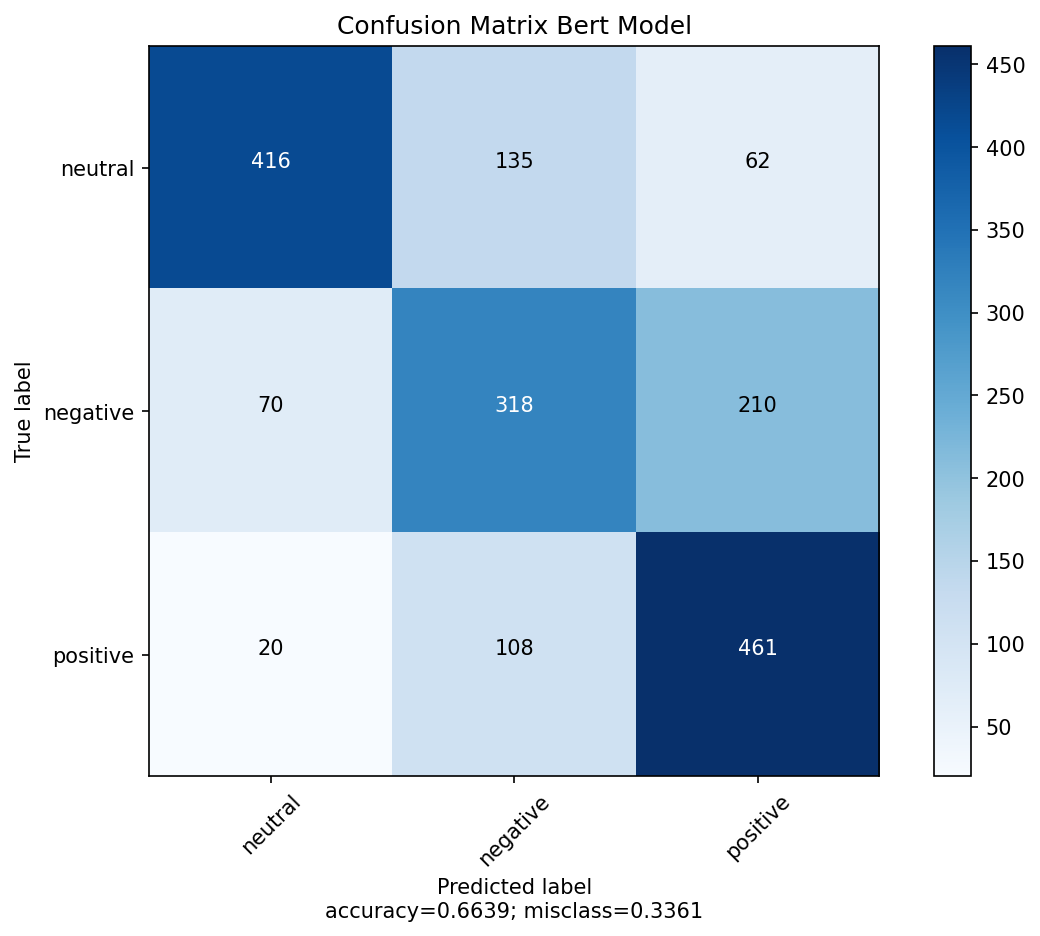

In [ ]:
y_test_pred = bert_model.predict(ds_test_encoded,
                                 batch_size=batch_size)

y_test_pred_class = y_test_pred[0].argmax(axis=1)
cm_bert = confusion_matrix(list(y_test_bert),list(y_test_pred_class))

plot_confusion_matrix(cm_bert,
                      normalize=False,
                      target_names=['neutral', 'negative', 'positive'],
                      title="Confusion Matrix Bert Model")

In [ ]:
''' save_path = '/content/gdrive/MyDrive/Progetto Marketing Analytics/bert_model'  # Update with your desired path and model name
bert_model.save(save_path) '''

" save_path = '/content/gdrive/MyDrive/Progetto Marketing Analytics/bert_model'  # Update with your desired path and model name\nbert_model.save(save_path) "

In [ ]:
''' bert_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Progetto Marketing Analytics/bert_model') '''

" bert_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Progetto Marketing Analytics/bert_model') "

## New prediction





In [ ]:
customer_reviews_info = customer_reviews.merge(customer_accounts, on='customer_id', how='left')
x_new = customer_reviews_info.sample(n=3000,random_state=42)

In [ ]:
input_ids_list=[]
for sentence in x_new['review_text']:
  bert_input = convert_example_to_feature(sentence)
  input_ids_list.append(bert_input['input_ids'])
tf.data.Dataset.from_tensor_slices((input_ids_list))
test_new_bert = bert_model.predict(input_ids_list, batch_size=4)
test_new_class_bert = test_new_bert[0].argmax(axis=1)

750/750 [==============================] - 114s 152ms/step


In [ ]:
def count_new(test_new_class_bert):
  cont_diz = {}

  cont_diz['cont_pos']=0
  cont_diz['cont_neg']=0
  cont_diz['cont_neu']=0

  for el in range(len(test_new_class_bert)):
    if test_new_class_bert[el]==2:
      cont_diz['cont_pos']+=1
    if test_new_class_bert[el]==0:
      cont_diz['cont_neg']+=1
    if test_new_class_bert[el]==1:
      cont_diz['cont_neu']+=1

  print(f"{cont_diz['cont_pos']} positive, {cont_diz['cont_neg']} negative, {cont_diz['cont_neu']} neutral")

In [ ]:
x_new['predicted_sentiment'] = test_new_class_bert

## Sentiment Comparison between Customer loyalty type

In [ ]:
grouped_data = x_new.groupby('loyalty_type')

In [ ]:
# Iterate over the groups
for group_label, group_indices in grouped_data.groups.items():
    # Access each grouped DataFrame using the group indices
    group_df = x_new.loc[group_indices]

    # Perform operations on the grouped DataFrame
    # For example, print the group label and the first few rows of the group
    print("Group:", group_label)
    count_new(group_df['predicted_sentiment'].to_numpy())
    #print(group_df['predicted_sentiment'].head())
    print()

Group: business premium
2 positive, 78 negative, 1 neutral

Group: business standard
4 positive, 227 negative, 5 neutral

Group: premium
9 positive, 520 negative, 3 neutral

Group: standard
44 positive, 2074 negative, 33 neutral



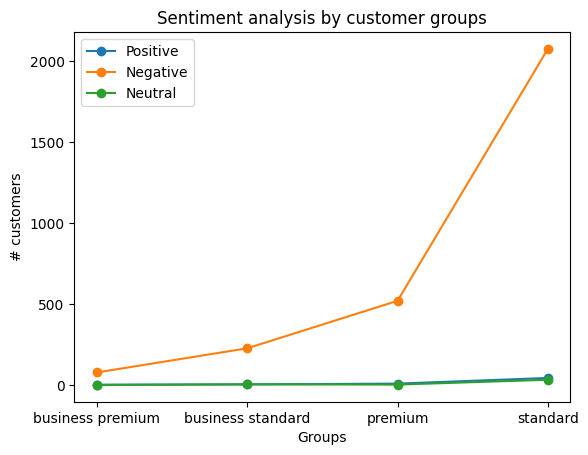

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each group
group_names = ['business premium', 'business standard', 'premium', 'standard']
positive = [2, 4, 9, 44]
negative = [78, 227, 520, 2074]
neutral = [1, 5, 3, 33]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the line plot for each group
ax.plot(group_names, positive, marker='o', label='Positive')
ax.plot(group_names, negative, marker='o', label='Negative')
ax.plot(group_names, neutral, marker='o', label='Neutral')

# Set the labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('# customers')
ax.set_title('Sentiment analysis by customer groups')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# CHURN

In [ ]:
import datetime
tbl_orders_sistemato=orders
# Eseguire la separazione per ogni valore nella colonna 'purchase_datetime'
for index, row in tbl_orders_sistemato.iterrows():
    data_ora = row['purchase_datetime']

    # Separazione della data e dell'ora
    data = data_ora[:10]  # Prende i primi 10 caratteri (la parte della data)
    ora = data_ora[11:]  # Prende i caratteri dalla posizione 11 in poi (la parte dell'ora)

    # Conversione della stringa della data in un oggetto datetime (se necessario)
    data = datetime.datetime.strptime(data, "%Y-%m-%d").date()

    # Assegna i valori separati alle nuove colonne
    tbl_orders_sistemato.at[index, 'Data'] = data
    tbl_orders_sistemato.at[index, 'Ora'] = ora

# Stampa il DataFrame con le nuove colonne
tbl_orders_sistemato

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Data,Ora
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,2022-10-04,182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851,2022-10-04,182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851,2022-10-04,182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851,2022-10-04,182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851,2022-10-04,182851
...,...,...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553,2023-04-30,193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955,2023-04-30,191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955,2023-04-30,191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217,2023-04-30,193217


In [ ]:
df=pd.merge(customer_accounts, customers, on='customer_id')
df1=pd.merge(df, tbl_orders_sistemato, on='customer_id')
df1

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,address_id,birthdate,gender,job_type,...,flag_privacy,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Data,Ora
0,9557,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,NaN,...,True,d0f81b8c0d6881215ba7ac29b6aac928,9,81273175,1,5.98,0.00,2023-01-11T132637,2023-01-11,132637
1,9557,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,NaN,...,True,d0f81b8c0d6881215ba7ac29b6aac928,9,36593872,1,9.90,0.00,2023-01-11T132637,2023-01-11,132637
2,9557,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,NaN,...,True,26c74fbdf90a887f679dbd375d51410c,9,35925022,1,2.99,0.30,2023-01-25T184429,2023-01-25,184429
3,9557,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,NaN,...,True,f4028cd8175457c3916581a91fe85fd0,9,36142274,1,12.90,1.29,2023-03-13T154623,2023-03-13,154623
4,9557,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,NaN,...,True,f4028cd8175457c3916581a91fe85fd0,9,32756010,1,34.95,3.49,2023-03-13T154623,2023-03-13,154623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043029,934581,927773,29,standard,1,2023-04-30,899757,1979-09-28,M,NaN,...,True,697c0078b69d9f8c119d8dd9a7952019,29,35508942,1,33.60,0.00,2023-04-30T193553,2023-04-30,193553
1043030,934620,927816,44,standard,1,2023-04-30,899796,1964-01-29,F,NaN,...,True,86c9c4fdb8829e2ab90a86a357763419,44,36237691,1,11.99,0.00,2023-04-30T191955,2023-04-30,191955
1043031,934620,927816,44,standard,1,2023-04-30,899796,1964-01-29,F,NaN,...,True,86c9c4fdb8829e2ab90a86a357763419,44,81259479,1,9.99,0.00,2023-04-30T191955,2023-04-30,191955
1043032,934660,927866,46,standard,1,2023-04-30,899836,1979-05-18,F,NaN,...,True,86f8ca9e4008249e5e0acc5ff23e2284,46,34067775,1,1.90,0.00,2023-04-30T193217,2023-04-30,193217


In [7]:
!pip install seaborn
import seaborn as sns

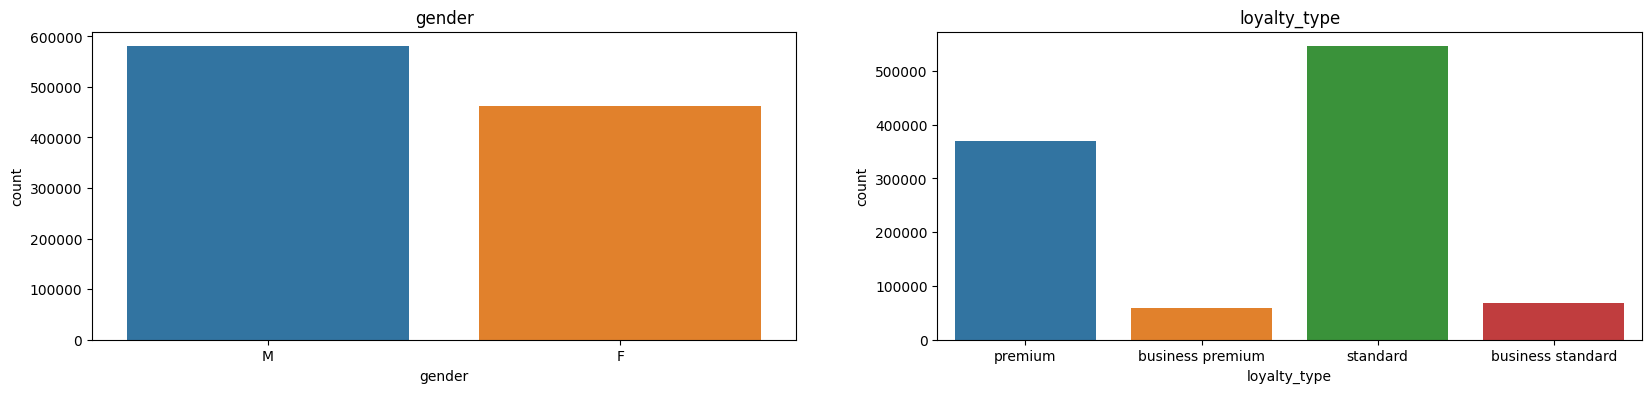

In [ ]:
cols = ['gender','loyalty_type']
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

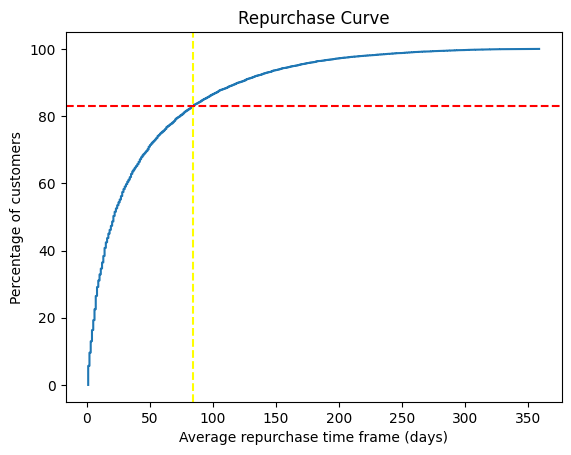

In [ ]:
# Calcola la differenza di tempo tra ogni acquisto consecutivo per ogni cliente
df['time_diff'] = df1.groupby('customer_id')['Data'].diff().dt.days

# Calcola l'intervallo di tempo medio di riacquisto per ogni cliente
mean_repurchase_time = df.groupby('customer_id')['time_diff'].mean()

# Elimina gli intervalli di tempo medio di riacquisto negativi
mean_repurchase_time = mean_repurchase_time[mean_repurchase_time >= 1]

# Calcola la percentuale cumulata dei clienti sulla Y
num_customers = len(mean_repurchase_time)
percent_customers = np.arange(1, num_customers + 1) / num_customers * 100

# Ordina i valori dell'intervallo di tempo medio in ordine crescente
mean_repurchase_time = mean_repurchase_time.sort_values()

# Crea la curva di repurchase utilizzando il grafico a linee
plt.plot(mean_repurchase_time.values, percent_customers)
plt.xlabel('Average repurchase time frame (days)')
plt.ylabel('Percentage of customers')
plt.title('Repurchase Curve')

# Aggiunge la linea rossa orizzontale all'83%
plt.axhline(y=83, color='red', linestyle='--')

# Trova il punto di intersezione tra la linea rossa e la curva di repurchase
intersection_point = np.interp(83, percent_customers, mean_repurchase_time.values)

# Aggiunge una linea verticale nel punto di intersezione
plt.axvline(x=intersection_point, color='yellow', linestyle='--')

plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Calcola la differenza in giorni tra l'acquisto precedente e la media su di esso per ogni cliente
df['purchase_date'] = pd.to_datetime(df['Data'])
df['previous_purchase_date'] = df.groupby('customer_id')['purchase_date'].shift(1)
df['days_since_previous_purchase'] = (df['purchase_date'] - df['previous_purchase_date']).dt.days
df['mean_days_between_purchases'] = df.groupby('customer_id')['days_since_previous_purchase'].transform('mean')

# Trova le percentuali cumulative e determina la scala temporale del riacquisto
df['cumulative_percent'] = df.groupby('customer_id')['days_since_previous_purchase'].cumsum() / df.groupby('customer_id')['days_since_previous_purchase'].sum()
df['time_scale_of_repurchase'] = df.groupby('customer_id')['cumulative_percent'].transform('max')

# Calcola la differenza rispetto all'ultimo giorno nel set di dati (01/05/2023)
last_day = pd.to_datetime('2023-05-01')
df['days_since_last_day'] = (last_day - df['purchase_date']).dt.days

# Etichetta i clienti come inattivi (churn) o attivi
df['Churn'] = np.where(df['mean_days_between_purchases'] > 83, '1', '0') # churn=1 , no churn=0

# Crea un nuovo DataFrame con i customer_id unici e le etichette Churn o No Churn
new_df = df[['customer_id', 'Churn']].drop_duplicates()

# Visualizza il nuovo DataFrame
print(new_df)


         customer_id Churn
0               9557     0
8             743090     0
11            813156     0
82            843392     0
87             20476     0
...              ...   ...
1043024       934484     0
1043029       934581     0
1043030       934620     0
1043032       934660     0
1043033       934716     0

[104134 rows x 2 columns]


In [ ]:
df['Churn'] = df['Churn'].astype(int)

In [ ]:
df = new_df.merge(df1.drop_duplicates(subset='customer_id'), on='customer_id')

In [ ]:
df

,customer_id,Churn,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,address_id,birthdate,gender,...,flag_privacy,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Data,Ora
0,9557,0,746573,9,premium,1,2023-01-11,8460,1977-03-20,M,...,True,d0f81b8c0d6881215ba7ac29b6aac928,9,81273175,1,5.98,0.00,2023-01-11T132637,2023-01-11,132637
1,743090,0,776971,2,premium,1,2023-01-30,727641,1965-03-01,F,...,True,036db3196bd9554942403a571fd1e7ce,2,35075523,1,7.65,0.00,2023-02-13T071343,2023-02-13,071343
2,813156,0,791681,45,premium,1,2023-02-08,794773,1964-10-18,M,...,False,6d629a2d04db81d4b31da7dc54f913e3,45,36128176,1,2.99,0.30,2023-02-08T173606,2023-02-08,173606
3,843392,0,825439,1,premium,1,2023-03-01,825086,1982-07-04,F,...,True,71c5f9f3f90bfb0ff5edf7656a7f094c,17,35551915,1,429.80,42.98,2023-03-31T123239,2023-03-31,123239
4,20476,0,815010,16,premium,1,2023-02-23,17525,1952-03-23,M,...,True,73f10fdd497f3b67249efdedd6b710c1,16,35411810,1,1.99,0.20,2023-02-23T134401,2023-02-23,134401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104129,934484,0,927671,17,standard,1,2023-04-30,899663,1979-06-07,F,...,True,b577e0cb3254ef8e4965ebc0643c90af,17,33817091,1,0.50,0.00,2023-04-30T190211,2023-04-30,190211
104130,934581,0,927773,29,standard,1,2023-04-30,899757,1979-09-28,M,...,True,697c0078b69d9f8c119d8dd9a7952019,29,35508942,1,33.60,0.00,2023-04-30T193553,2023-04-30,193553
104131,934620,0,927816,44,standard,1,2023-04-30,899796,1964-01-29,F,...,True,86c9c4fdb8829e2ab90a86a357763419,44,36237691,1,11.99,0.00,2023-04-30T191955,2023-04-30,191955
104132,934660,0,927866,46,standard,1,2023-04-30,899836,1979-05-18,F,...,True,86f8ca9e4008249e5e0acc5ff23e2284,46,34067775,1,1.90,0.00,2023-04-30T193217,2023-04-30,193217


In [ ]:
df = df.drop(['job_type','flag_phone_provided','email_provider','activation_date', 'birthdate', 'order_id', 'gross_price','product_id', 'price_reduction','purchase_datetime','Ora','Data'], axis=1)


In [ ]:
df

,customer_id,Churn,account_id,favorite_store,loyalty_type,loyatlty_status,address_id,gender,flag_privacy,store_id,direction
0,9557,0,746573,9,premium,1,8460,M,True,9,1
1,743090,0,776971,2,premium,1,727641,F,True,2,1
2,813156,0,791681,45,premium,1,794773,M,False,45,1
3,843392,0,825439,1,premium,1,825086,F,True,17,1
4,20476,0,815010,16,premium,1,17525,M,True,16,1
...,...,...,...,...,...,...,...,...,...,...,...
104129,934484,0,927671,17,standard,1,899663,F,True,17,1
104130,934581,0,927773,29,standard,1,899757,M,True,29,1
104131,934620,0,927816,44,standard,1,899796,F,True,44,1
104132,934660,0,927866,46,standard,1,899836,F,True,46,1


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,customer_id,Churn,account_id,favorite_store,loyatlty_status,address_id,flag_privacy,store_id,direction,loyalty_type_business standard,loyalty_type_premium,loyalty_type_standard,gender_M
0,9557,0,746573,9,1,8460,True,9,1,0,1,0,1
1,743090,0,776971,2,1,727641,True,2,1,0,1,0,0
2,813156,0,791681,45,1,794773,False,45,1,0,1,0,1
3,843392,0,825439,1,1,825086,True,17,1,0,1,0,0
4,20476,0,815010,16,1,17525,True,16,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104129,934484,0,927671,17,1,899663,True,17,1,0,0,1,0
104130,934581,0,927773,29,1,899757,True,29,1,0,0,1,1
104131,934620,0,927816,44,1,899796,True,44,1,0,0,1,0
104132,934660,0,927866,46,1,899836,True,46,1,0,0,1,0


In [ ]:
conteggio1 = df['Churn_1'].value_counts()
conteggio1

0    101182
1      2952
Name: Churn_1, dtype: int64

In [ ]:

# Calcola la proporzione desiderata
proporzione_1 = 0.3  # 30% di valori pari a 1
proporzione_0 = 1 - proporzione_1  # 70% di valori pari a 0

# Ottieni gli indici dei valori pari a 1 e 0
indici_1 = df.index[df['Churn'] == 1]
indici_0 = df.index[df['Churn'] == 0]

# Seleziona casualmente gli indici dei valori pari a 1 e 0 in base alle proporzioni desiderate
nuovi_indici_1 = np.random.choice(indici_1, size=int(len(df) * proporzione_1), replace=True)
nuovi_indici_0 = np.random.choice(indici_0, size=int(len(df) * proporzione_0), replace=True)

# Combina gli indici selezionati per ottenere gli indici finali
indici_finali = np.concatenate((nuovi_indici_1, nuovi_indici_0))

# Seleziona solo le righe corrispondenti agli indici finali
df_campionato = df.loc[indici_finali]

# Visualizza le proporzioni delle classi nel dataframe campionato
proporzioni_campionato = df_campionato['Churn'].value_counts(normalize=True)
print(proporzioni_campionato)



0    0.699999
1    0.300001
Name: Churn, dtype: float64


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X = df_campionato.drop('Churn', axis=1)
y = df_campionato['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Creazione dei modelli
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
decision_tree_model = DecisionTreeClassifier()

# Addestramento dei modelli
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:

# Esempio di predizione dei modelli
y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

# Calcolo delle metriche per il modello di regressione logistica
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Calcolo delle metriche per il modello di Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calcolo delle metriche per il modello di Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Calcolo delle metriche per il modello Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Stampa delle metriche
print("Metrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print()

print("Metrics for Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print()

print("Metrics for Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print()

print("Metrics for Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)


Metrics for Logistic Regression:
Accuracy: 0.6993806117059587
Precision: 0.4177215189873418
Recall: 0.010585404971932638
F1-score: 0.020647583294228063

Metrics for Random Forest:
Accuracy: 0.987420175733423
Precision: 0.9603823030676738
Recall: 0.9991980753809142
F1-score: 0.9794057538122937

Metrics for Gradient Boosting:
Accuracy: 0.7191146108416959
Precision: 0.6500389711613406
Recall: 0.13376102646351243
F1-score: 0.22186751795690343

Metrics for Decision Tree:
Accuracy: 0.9733999135737265
Precision: 0.9190146039238826
Recall: 0.9991980753809142
F1-score: 0.9574304595051482


In [9]:
import numpy as np
import matplotlib.pyplot as plt

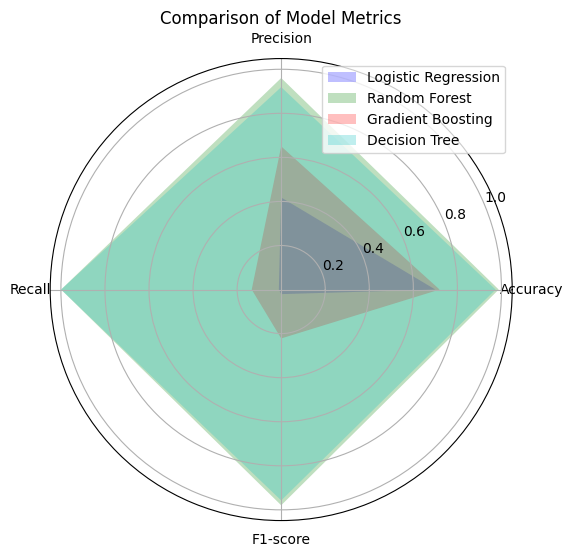

In [ ]:


# Creazione di un array con le metriche dei modelli
metrics_lr = np.array([accuracy_lr, precision_lr, recall_lr, f1_lr])
metrics_rf = np.array([accuracy_rf, precision_rf, recall_rf, f1_rf])
metrics_gb = np.array([accuracy_gb, precision_gb, recall_gb, f1_gb])
metrics_dt = np.array([accuracy_dt, precision_dt, recall_dt, f1_dt])

# Creazione dell'array delle etichette delle metriche
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Creazione di un array con le etichette dei modelli
model_labels = np.array(['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'])

# Calcolo dell'angolo per ogni metrica
angles = np.linspace(0, 2 * np.pi, len(metric_labels), endpoint=False).tolist()

# Aggiunta dell'angolo finale per chiudere il grafico
angles += angles[:1]

# Creazione del grafico radar
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.fill(angles, metrics_lr.tolist() + metrics_lr[:1].tolist(), 'b', alpha=0.25)
ax.fill(angles, metrics_rf.tolist() + metrics_rf[:1].tolist(), 'g', alpha=0.25)
ax.fill(angles, metrics_gb.tolist() + metrics_gb[:1].tolist(), 'r', alpha=0.25)
ax.fill(angles, metrics_dt.tolist() + metrics_dt[:1].tolist(), 'c', alpha=0.25)

# Aggiunta delle etichette delle metriche
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_labels)

# Aggiunta delle etichette dei modelli
ax.legend(model_labels)

# Aggiunta di un titolo al grafico
plt.title('Comparison of Model Metrics')

# Visualizzazione del grafico
plt.show()

# RFM

In [ ]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np

df=pd.merge(customer_accounts, orders, on='customer_id')
df



,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Data,Ora
0,9557,746573,9,premium,1,2023-01-11,d0f81b8c0d6881215ba7ac29b6aac928,9,81273175,1,5.98,0.00,2023-01-11T132637,2023-01-11,132637
1,9557,746573,9,premium,1,2023-01-11,d0f81b8c0d6881215ba7ac29b6aac928,9,36593872,1,9.90,0.00,2023-01-11T132637,2023-01-11,132637
2,9557,746573,9,premium,1,2023-01-11,26c74fbdf90a887f679dbd375d51410c,9,35925022,1,2.99,0.30,2023-01-25T184429,2023-01-25,184429
3,9557,746573,9,premium,1,2023-01-11,f4028cd8175457c3916581a91fe85fd0,9,36142274,1,12.90,1.29,2023-03-13T154623,2023-03-13,154623
4,9557,746573,9,premium,1,2023-01-11,f4028cd8175457c3916581a91fe85fd0,9,32756010,1,34.95,3.49,2023-03-13T154623,2023-03-13,154623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043029,934581,927773,29,standard,1,2023-04-30,697c0078b69d9f8c119d8dd9a7952019,29,35508942,1,33.60,0.00,2023-04-30T193553,2023-04-30,193553
1043030,934620,927816,44,standard,1,2023-04-30,86c9c4fdb8829e2ab90a86a357763419,44,36237691,1,11.99,0.00,2023-04-30T191955,2023-04-30,191955
1043031,934620,927816,44,standard,1,2023-04-30,86c9c4fdb8829e2ab90a86a357763419,44,81259479,1,9.99,0.00,2023-04-30T191955,2023-04-30,191955
1043032,934660,927866,46,standard,1,2023-04-30,86f8ca9e4008249e5e0acc5ff23e2284,46,34067775,1,1.90,0.00,2023-04-30T193217,2023-04-30,193217


In [ ]:
import datetime

# Eseguire la separazione per ogni valore nella colonna 'purchase_datetime'
for index, row in df.iterrows():
    data_ora = row['purchase_datetime']

    # Separazione della data e dell'ora
    data = data_ora[:10]  # Prende i primi 10 caratteri (la parte della data)
    ora = data_ora[11:]  # Prende i caratteri dalla posizione 11 in poi (la parte dell'ora)

    # Conversione della stringa della data in un oggetto datetime (se necessario)
    data = datetime.datetime.strptime(data, "%Y-%m-%d").date()

    # Assegna i valori separati alle nuove colonne
    df.at[index, 'Data'] = data
    df.at[index, 'Ora'] = ora

# Stampa il DataFrame con le nuove colonne
df


,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Data,Ora
0,9557,746573,9,premium,1,2023-01-11,d0f81b8c0d6881215ba7ac29b6aac928,9,81273175,1,5.98,0.00,2023-01-11T132637,2023-01-11,132637
1,9557,746573,9,premium,1,2023-01-11,d0f81b8c0d6881215ba7ac29b6aac928,9,36593872,1,9.90,0.00,2023-01-11T132637,2023-01-11,132637
2,9557,746573,9,premium,1,2023-01-11,26c74fbdf90a887f679dbd375d51410c,9,35925022,1,2.99,0.30,2023-01-25T184429,2023-01-25,184429
3,9557,746573,9,premium,1,2023-01-11,f4028cd8175457c3916581a91fe85fd0,9,36142274,1,12.90,1.29,2023-03-13T154623,2023-03-13,154623
4,9557,746573,9,premium,1,2023-01-11,f4028cd8175457c3916581a91fe85fd0,9,32756010,1,34.95,3.49,2023-03-13T154623,2023-03-13,154623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043029,934581,927773,29,standard,1,2023-04-30,697c0078b69d9f8c119d8dd9a7952019,29,35508942,1,33.60,0.00,2023-04-30T193553,2023-04-30,193553
1043030,934620,927816,44,standard,1,2023-04-30,86c9c4fdb8829e2ab90a86a357763419,44,36237691,1,11.99,0.00,2023-04-30T191955,2023-04-30,191955
1043031,934620,927816,44,standard,1,2023-04-30,86c9c4fdb8829e2ab90a86a357763419,44,81259479,1,9.99,0.00,2023-04-30T191955,2023-04-30,191955
1043032,934660,927866,46,standard,1,2023-04-30,86f8ca9e4008249e5e0acc5ff23e2284,46,34067775,1,1.90,0.00,2023-04-30T193217,2023-04-30,193217


Here we are calculating recency for customers who had made a purchase with a company.

In [ ]:
df_recency = df.groupby(by='customer_id',as_index=False)['Data'].max()
df_recency.columns = ['customer_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency


,customer_id,LastPurchaseDate,Recency
0,23,2023-02-20,69
1,30,2022-07-23,281
2,32,2023-04-02,28
3,48,2023-04-30,0
4,50,2023-02-19,70
...,...,...,...
104129,934484,2023-04-30,0
104130,934581,2023-04-30,0
104131,934620,2023-04-30,0
104132,934660,2023-04-30,0


We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.

In [ ]:
frequency_df = df.drop_duplicates().groupby(by=['customer_id'], as_index=False)['Data'].count()
frequency_df.columns = ['customer_id', 'Frequency']
frequency_df

,customer_id,Frequency
0,23,38
1,30,4
2,32,11
3,48,68
4,50,4
...,...,...
104129,934484,5
104130,934581,1
104131,934620,2
104132,934660,1


Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [ ]:
df['Total'] = df['gross_price'] - df['price_reduction']
df['direction'] = df['direction'].astype(int)  # Assicurati che la colonna 'acquistato' sia di tipo intero
monetary_df = df.loc[df['direction'] == 1].groupby('customer_id')['Total'].sum().reset_index()
monetary_df.columns = ['customer_id', 'Monetary']
monetary_df


,customer_id,Monetary
0,23,481.64
1,30,9772.83
2,32,58.85
3,48,1465.17
4,50,26.04
...,...,...
104129,934484,35.01
104130,934581,33.60
104131,934620,21.98
104132,934660,1.90


Merge the three columns

In [ ]:
rf_df = df_recency.merge(frequency_df, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(
    columns='LastPurchaseDate')
rfm_df

,customer_id,Recency,Frequency,Monetary
0,23,69,38,481.64
1,30,281,4,9772.83
2,32,28,11,58.85
3,48,0,68,1465.17
4,50,70,4,26.04
...,...,...,...,...
104129,934484,0,5,35.01
104130,934581,0,1,33.60
104131,934620,0,2,21.98
104132,934660,0,1,1.90


Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df


,customer_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,23,69,38,481.64,63.286600,97.090288,97.090288
1,30,281,4,9772.83,11.119423,43.073348,43.073348
2,32,28,11,58.85,82.705533,75.776403,75.776403
3,48,0,68,1465.17,100.000000,99.393090,99.393090
4,50,70,4,26.04,63.004754,43.073348,43.073348
...,...,...,...,...,...,...,...
104129,934484,0,5,35.01,100.000000,50.622275,50.622275
104130,934581,0,1,33.60,100.000000,8.067970,8.067970
104131,934620,0,2,21.98,100.000000,22.405746,22.405746
104132,934660,0,1,1.90,100.000000,8.067970,8.067970


**Calculating RFM score**

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_Score']]


,customer_id,RFM_Score
0,23,4.60
1,30,1.91
2,32,3.84
3,48,4.97
4,50,2.30
...,...,...
104129,934484,2.90
104130,934581,1.09
104131,934620,1.70
104132,934660,1.09


**Rating Customer based upon the RFM score**

rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score<1.6 :Lost Customer

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
(np.where(
rfm_df['RFM_Score'] > 3,
"Medium Value Customer",
np.where(rfm_df['RFM_Score'] > 1.6,
'Low Value Customers', 'Lost Customers'))))))
rfm_df[['customer_id', 'RFM_Score', 'Customer_segment']].head(20)


,customer_id,RFM_Score,Customer_segment
0,23,4.60,Top Customers
1,30,1.91,Low Value Customers
2,32,3.84,Medium Value Customer
3,48,4.97,Top Customers
4,50,2.30,Low Value Customers
5,60,0.66,Lost Customers
6,76,1.96,Low Value Customers
7,86,2.15,Low Value Customers
8,95,1.62,Low Value Customers
9,108,0.52,Lost Customers


Visualizing the customer segments

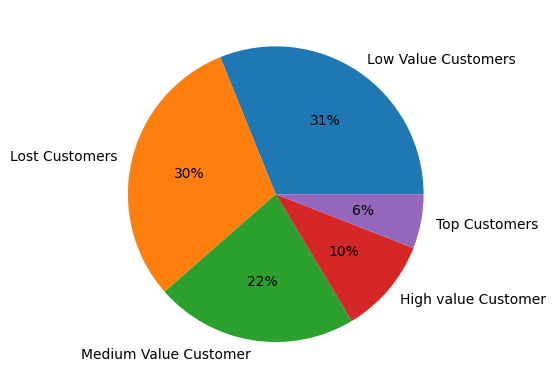

In [ ]:
import matplotlib. pyplot as plt

plt.pie(rfm_df.Customer_segment.value_counts(),
labels=rfm_df.Customer_segment.value_counts().index,
autopct='%.0f%%')
plt.show()


# MBA


In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Combinazione dei dati dei clienti, degli ordini e dei prodotti
data = orders.merge(products, on='product_id', how='left')
complete_dat = data.merge(customer_accounts, on='customer_id', how='left')
complete_data = complete_dat.merge(rfm_df, on='customer_id', how='left')
lost_customers_data = complete_data[complete_data['Customer_segment'] == 'Lost Customers']
lost_customers_data

## Customer ID - Product Class





In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [ ]:


# Convert columns to strings
complete_data['customer_id'] = complete_data['customer_id'].astype(str)
complete_data['product_class'] = complete_data['product_class'].astype(str)

# Group customer_id by product_class and create transactions
grouped_data = complete_data.groupby(['customer_id'])['product_class'].apply(list).reset_index()
transactions = grouped_data.drop('customer_id', axis=1)

# Encode transactions
te = TransactionEncoder()
basket_input = te.fit_transform(grouped_data['product_class'])
basket_input = pd.DataFrame(basket_input, columns=te.columns_)

# Perform Apriori analysis
frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

# Add customer_id as index in the rules DataFrame
rules['customer_id'] = grouped_data['customer_id']
rules.set_index('customer_id', inplace=True)

# Sort by important metrics
rules.sort_values(by='confidence', ascending=False, inplace=True)
print("Sorted by confidence:")
print(rules.head().to_string(header=True))
print("\n")

rules.sort_values(by='lift', ascending=False, inplace=True)
print("Sorted by lift:")
print(rules.head().to_string(header=True))
print("\n")

rules.sort_values(by='support', ascending=False, inplace=True)
print("Sorted by support:")
print(rules.head().to_string(header=True))
print("\n")

# Sort rules by support in descending order
rules.sort_values(by='support', ascending=False, inplace=True)

# Print most frequent association rules
print("Most Frequently Purchased Product Classes Together:")
print(rules.head().to_string(header=True, index=False, columns=['antecedents', 'consequents', 'support']))
print("\n")

# Calculate product_class counts in transactions
product_counts = basket_input.sum().sort_values(ascending=False)

# Print top purchased product classes
print("Top Purchased Product Classes:")
print(product_counts.head().to_string(header=True))
print("\n\n\n")

# Create graph
# Select only the first 10 nodes
top_nodes = list(rules['antecedents'].iloc[:10]) + list(rules['consequents'].iloc[:10])
top_nodes = list(set(top_nodes))

# Create the graph
G = nx.DiGraph()

# Add nodes
for node in top_nodes:
    G.add_node(node)

# Add edges with support value labels
for index, row in rules.iloc[:10].iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    support = row['support']
    G.add_edge(antecedents, consequents, label=f"Support: {support:.3f}")

# Position nodes in the graph
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10, node_color='lightblue',
                 edge_color='gray', arrowsize=20, linewidths=1, alpha=0.8)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Graph title
plt.title("Association Rule Graph (Top 10 Nodes)")

# Show the graph
plt.axis('off')
plt.show()
print("\n\n\n")

# Create lift dataframe for antecedents and consequents
antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
lift = rules['lift']
lift_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Lift': lift})

# Sort values by lift in descending order
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

# Take only the top 10 highest lift values
top_10_lift = lift_df.head(10)

# Transform data to create a lift matrix
heatmap_data = top_10_lift.pivot(index='Antecedents', columns='Consequents', values='Lift')

# Generate Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Lift of Product Classes (Top 10)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
print("\n\n\n")

# Create confidence dataframe for antecedents and consequents
antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
confidence = rules['confidence']
confidence_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Confidence': confidence})

# Sort values by confidence in descending order
confidence_df.sort_values(by='Confidence', ascending=False, inplace=True)

# Take only the top 10 highest confidence values
top_10_confidence = confidence_df.head(10)

# Transform data to create a confidence matrix
heatmap_data = top_10_confidence.pivot(index='Antecedents', columns='Consequents', values='Confidence')

# Generate Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Confidence of Product Classes (Top 10)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
print("\n\n\n")

# Create a bar plot for top purchased product classes
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
plt.title('Top Purchased Product Classes')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\n\n\n")



## Customer ID - Product ID


In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [ ]:


# Convert columns to strings
complete_data['customer_id'] = complete_data['customer_id'].astype(str)
complete_data['product_id'] = complete_data['product_id'].astype(str)

# Group customer_id by product_id and create transactions
grouped_data = complete_data.groupby(['customer_id'])['product_id'].apply(list).reset_index()
transactions = grouped_data.drop('customer_id', axis=1)

# Encode transactions
te = TransactionEncoder()
basket_input = te.fit_transform(grouped_data['product_id'])
basket_input = pd.DataFrame(basket_input, columns=te.columns_)

# Perform Apriori analysis
frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

# Add customer_id as index in the rules DataFrame
rules['customer_id'] = grouped_data['customer_id']
rules.set_index('customer_id', inplace=True)

# Sort by important metrics
rules.sort_values(by='confidence', ascending=False, inplace=True)
print("Sorted by confidence:")
print(rules.head().to_string(header=True))
print("\n---\n")

rules.sort_values(by='lift', ascending=False, inplace=True)
print("Sorted by lift:")
print(rules.head().to_string(header=True))
print("\n---\n")

rules.sort_values(by='support', ascending=False, inplace=True)
print("Sorted by support:")
print(rules.head().to_string(header=True))
print("\n---\n")

# Sort rules by support in descending order
rules.sort_values(by='support', ascending=False, inplace=True)

# Print most frequent association rules
print("Most Frequently Purchased Product Classes Together:")
print(rules.head().to_string(header=True, index=False, columns=['antecedents', 'consequents', 'support']))
print("\n---\n")

# Calculate product_id counts in transactions
product_counts = basket_input.sum().sort_values(ascending=False)

# Print top purchased product id
print("Top Purchased Product ID:")
print(product_counts.head().to_string(header=True))
print("\n---\n\n")

# Create graph
# Select only the first 10 nodes
top_nodes = list(rules['antecedents'].iloc[:10]) + list(rules['consequents'].iloc[:10])
top_nodes = list(set(top_nodes))

# Create the graph
G = nx.DiGraph()

# Add nodes
for node in top_nodes:
    G.add_node(node)

# Add edges with support value labels
for index, row in rules.iloc[:10].iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    support = row['support']
    G.add_edge(antecedents, consequents, label=f"Support: {support:.3f}")

# Position nodes in the graph
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10, node_color='lightblue',
                 edge_color='gray', arrowsize=20, linewidths=1, alpha=0.8)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Graph title
plt.title("Association Rule Graph (Top 10 Nodes)")

# Show the graph
plt.axis('off')
plt.show()
print("\n---\n\n")

# Create lift dataframe for antecedents and consequents
antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
lift = rules['lift']
lift_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Lift': lift})

# Sort values by lift in descending order
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

# Take only the top 10 highest lift values
top_10_lift = lift_df.head(10)

# Transform data to create a lift matrix
heatmap_data = top_10_lift.pivot(index='Antecedents', columns='Consequents', values='Lift')

# Generate Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Lift of Product Classes (Top 10)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
print("\n---\n\n")

# Create confidence dataframe for antecedents and consequents
antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
confidence = rules['confidence']
confidence_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Confidence': confidence})

# Sort values by confidence in descending order
confidence_df.sort_values(by='Confidence', ascending=False, inplace=True)

# Take only the top 10 highest confidence values
top_10_confidence = confidence_df.head(10)

# Transform data to create a confidence matrix
heatmap_data = top_10_confidence.pivot(index='Antecedents', columns='Consequents', values='Confidence')

# Generate Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Confidence of Product Classes (Top 10)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
print("\n---\n\n")

# Create a bar plot for top purchased product id
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
plt.title('Top Purchased Product ID')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\n---\n")


## Loyalty Type - Product Class

In [ ]:
# Conversion of columns to strings
complete_data['loyalty_type'] = complete_data['loyalty_type'].astype(str)
complete_data['product_class'] = complete_data['product_class'].astype(str)

# Creation of separate tables for each loyalty_type
loyalty_types = complete_data['loyalty_type'].unique()
loyalty_tables = {}

for loyalty_type in loyalty_types:
    # Filter data for the current loyalty_type
    loyalty_data = complete_data[complete_data['loyalty_type'] == loyalty_type]

    # Group customer_id by product_class and create transactions
    grouped_data = loyalty_data.groupby(['customer_id'])['product_class'].apply(list).reset_index()
    transactions = grouped_data.drop('customer_id', axis=1)

    # Encode transactions
    te = TransactionEncoder()
    basket_input = te.fit_transform(grouped_data['product_class'])
    basket_input = pd.DataFrame(basket_input, columns=te.columns_)

    # Perform Apriori analysis
    frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift")

    # Add loyalty_type as index in the rules DataFrame
    rules['loyalty_type'] = loyalty_type
    rules.set_index('loyalty_type', inplace=True)

    # Sort by important metrics
    rules.sort_values(by='confidence', ascending=False, inplace=True)
    print(f"Sorted by confidence (loyalty_type: {loyalty_type}):")
    print(rules.head().to_string(header=True))
    print("\n")

    rules.sort_values(by='lift', ascending=False, inplace=True)
    print(f"Sorted by lift (loyalty_type: {loyalty_type}):")
    print(rules.head().to_string(header=True))
    print("\n")

    rules.sort_values(by='support', ascending=False, inplace=True)
    print(f"Sorted by support (loyalty_type: {loyalty_type}):")
    print(rules.head().to_string(header=True))
    print("\n")

    # Save the rules DataFrame in the corresponding table
    loyalty_tables[loyalty_type] = rules

    # Print most frequent association rules
    print(f"Most Frequently Purchased Product Classes Together (loyalty_type: {loyalty_type}):")
    print(rules.head().to_string(header=True, index=False, columns=['antecedents', 'consequents', 'support']))
    print("\n")

    # Calculate product_class counts in transactions
    product_counts = basket_input.sum().sort_values(ascending=False)

    # Print top purchased product classes
    print(f"Top Purchased Product Classes (loyalty_type: {loyalty_type}):")
    print(product_counts.head().to_string(header=True))
    print("\n")

    # Create graph
    # Select only the first 10 nodes
    top_nodes = list(rules['antecedents'].iloc[:10]) + list(rules['consequents'].iloc[:10])
    top_nodes = list(set(top_nodes))

    # Create the graph
    G = nx.DiGraph()

    # Add nodes
    for node in top_nodes:
        G.add_node(node)

    # Add edges with support value labels
    for index, row in rules.iloc[:10].iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        support = row['support']
        G.add_edge(antecedents, consequents, label=f"Support: {support:.3f}")

    # Position nodes in the graph
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10, node_color='lightblue',
                    edge_color='gray', arrowsize=20, linewidths=1, alpha=0.8)

    # Edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Graph title
    plt.title("Association Rule Graph (Top 10 Nodes)")

    # Show the graph
    plt.axis('off')
    plt.show()
    print("\n---\n\n")

    # Create lift dataframe for antecedents and consequents
    antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    lift = rules['lift']
    lift_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Lift': lift})

    # Sort values by lift in descending order
    lift_df.sort_values(by='Lift', ascending=False, inplace=True)

    # Take only the top 10 highest lift values
    top_10_lift = lift_df.head(10)

    # Transform data to create a lift matrix
    heatmap_data = top_10_lift.pivot(index='Antecedents', columns='Consequents', values='Lift')

    # Generate Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Heatmap - Lift of Product Classes (Top 10)')
    plt.xlabel('Consequents')
    plt.ylabel('Antecedents')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print("\n---\n\n")

    # Create confidence dataframe for antecedents and consequents
    antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    confidence = rules['confidence']
    confidence_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Confidence': confidence})

    # Sort values by confidence in descending order
    confidence_df.sort_values(by='Confidence', ascending=False, inplace=True)

    # Take only the top 10 highest confidence values
    top_10_confidence = confidence_df.head(10)

    # Transform data to create a confidence matrix
    heatmap_data = top_10_confidence.pivot(index='Antecedents', columns='Consequents', values='Confidence')

    # Generate Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Heatmap - Confidence of Product Classes (Top 10)')
    plt.xlabel('Consequents')
    plt.ylabel('Antecedents')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print("\n---\n\n")

    # Create a bar plot for top purchased product classes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
    plt.title('Top Purchased Product Classes')
    plt.xlabel('Product Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\n---\n\n\n\n\n")


## Customer_segment - Product Class

In [ ]:
# Conversion of columns to strings
complete_data['Customer_segment'] = complete_data['Customer_segment'].astype(str)
complete_data['product_class'] = complete_data['product_class'].astype(str)

# Creation of separate tables for each Customer_segment
customer_segments = complete_data['Customer_segment'].unique()
segment_tables = {}

for segment in customer_segments:
    segment_data = complete_data[complete_data['Customer_segment'] == segment]
    grouped_data = segment_data.groupby(['customer_id'])['product_class'].apply(list).reset_index()
    transactions = grouped_data.drop('customer_id', axis=1)
    # Encoding transactions
    te = TransactionEncoder()
    basket_input = te.fit_transform(grouped_data['product_class'])
    basket_input = pd.DataFrame(basket_input, columns=te.columns_)

    # Perform Apriori analysis
    frequent_itemsets = apriori(basket_input, min_support=0.0001, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift")
    # Add Customer_segment as an index in the rules DataFrame
    rules['Customer_segment'] = segment
    rules.set_index('Customer_segment', inplace=True)

    # Sort by important metrics
    rules.sort_values(by='confidence', ascending=False, inplace=True)
    print(f"Sorted by confidence (Customer_segment: {segment}):")
    print(rules.head().to_string(header=True))
    print("\n")

    rules.sort_values(by='lift', ascending=False, inplace=True)
    print(f"Sorted by lift (Customer_segment: {segment}):")
    print(rules.head().to_string(header=True))
    print("\n")

    rules.sort_values(by='support', ascending=False, inplace=True)
    print(f"Sorted by support (Customer_segment: {segment}):")
    print(rules.head().to_string(header=True))
    print("\n")

    # Save the rules DataFrame in the corresponding table
    segment_tables[segment] = rules

    # Print the most frequent association rules
    print(f"Most frequently purchased together (Customer_segment: {segment}):")
    print(rules.head().to_string(header=True, index=False, columns=['antecedents', 'consequents', 'support']))
    print("\n")

    # Calculate the count of product_id in the transactions
    product_counts = basket_input.sum().sort_values(ascending=False)

    # Print the most purchased product_ids
    print(f"Most purchased product_ids (Customer_segment: {segment}):")
    print(product_counts.head().to_string(header=True))
    print("\n")

    # Create graph for the current Customer_segment
    # Select only the first 10 nodes
    top_nodes = list(rules['antecedents'].iloc[:10]) + list(rules['consequents'].iloc[:10])
    top_nodes = list(set(top_nodes))

    # Create the graph
    G = nx.DiGraph()

    # Add nodes
    for node in top_nodes:
        G.add_node(node)

    # Add edges with support value labels
    for index, row in rules.iloc[:10].iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        support = row['support']
        G.add_edge(antecedents, consequents, label=f"Support: {support:.3f}")

    # Position nodes in the graph
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10, node_color='lightblue',
                    edge_color='gray', arrowsize=20, linewidths=1, alpha=0.8)

    # Edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Graph title
    plt.title("Association Rule Graph (Top 10 Nodes)")

    # Show the graph
    plt.axis('off')
    plt.show()
    print("\n---\n\n")

    # Create lift dataframe for antecedents and consequents
    antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    lift = rules['lift']
    lift_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Lift': lift})

    # Sort values by lift in descending order
    lift_df.sort_values(by='Lift', ascending=False, inplace=True)

    # Take only the top 10 highest lift values
    top_10_lift = lift_df.head(10)

    # Transform data to create a lift matrix
    heatmap_data = top_10_lift.pivot(index='Antecedents', columns='Consequents', values='Lift')

    # Generate Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Heatmap - Lift of Product Classes (Top 10)')
    plt.xlabel('Consequents')
    plt.ylabel('Antecedents')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print("\n---\n\n")

    # Create confidence dataframe for antecedents and consequents
    antecedents = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    consequents = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    confidence = rules['confidence']
    confidence_df = pd.DataFrame({'Antecedents': antecedents, 'Consequents': consequents, 'Confidence': confidence})

    # Sort values by confidence in descending order
    confidence_df.sort_values(by='Confidence', ascending=False, inplace=True)

    # Take only the top 10 highest confidence values
    top_10_confidence = confidence_df.head(10)

    # Transform data to create a confidence matrix
    heatmap_data = top_10_confidence.pivot(index='Antecedents', columns='Consequents', values='Confidence')

    # Generate Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Heatmap - Confidence of Product Classes (Top 10)')
    plt.xlabel('Consequents')
    plt.ylabel('Antecedents')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print("\n---\n\n")

    # Create a bar plot for top purchased product classes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
    plt.title('Top Purchased Product Classes')
    plt.xlabel('Product Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\n---\n\n\n\n\n")


In [14]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt